In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# transform data type
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
# how many accidents in different years
df['Year'] = df['Start_Time'].dt.year
# Drop rows where Year is 2023
df = df[df['Year'] != 2023]

In [5]:
# detect null value, sum and order them in asc
df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2192380
Wind_Chill(F)            1990741
Wind_Speed(mph)           563451
Visibility(mi)            170230
Wind_Direction            167423
Humidity(%)               167397
Weather_Condition         166830
Temperature(F)            157679
Pressure(in)              135013
Weather_Timestamp         114894
Airport_Code               21759
Sunrise_Sunset             21571
Civil_Twilight             21571
Nautical_Twilight          21571
Astronomical_Twilight      21571
Street                     10099
Timezone                    7579
Zipcode                     1856
City                         251
Description                    5
Railway                        0
No_Exit                        0
Station                        0
Roundabout                     0
Give_Way                       0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Lo

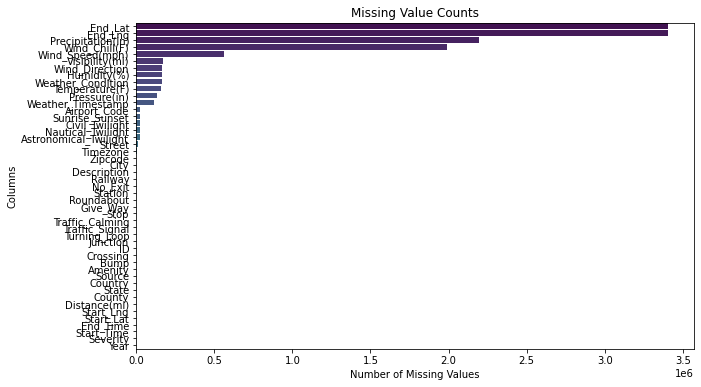

In [6]:
# Visualise missing values using Seaborn
missing_values = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.title('Missing Value Counts')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

In [7]:
# printout all states
df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

Coastal_or_Inland_Regions
Coastal_Regions    4580470
Inland_Regions     2736924
Others              164367
Name: Coastal_or_Inland_Regions, dtype: int64


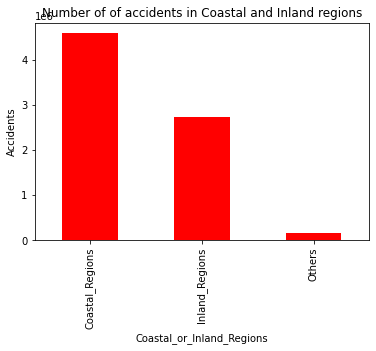

In [8]:
# define Coastal and Inland Regions
Coastal_Regions = ['CA', 'FL', 'GA', 'SC', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'MD', 'VA', 'DC', 'DE', 'AL', 'NC']
Inland_Regions = ['OH', 'WV', 'NE', 'IA', 'IL', 'MO', 'WI', 'IN', 'MI', 'PA', 'KY', 'TX', 'WA', 'OR', 'TN', 'LA', 'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT', 'WY', 'ID', 'ND', 'MT', 'SD']

# Function to classify regions
def classify(state):
    if state in Coastal_Regions:
        return 'Coastal_Regions'
    elif state in Inland_Regions:
        return 'Inland_Regions'
    else:
        return 'Others'
# Create 'Coastal_or_Inland_Regions' column
df['Coastal_or_Inland_Regions'] = df['State'].apply(classify)

# how many accidents in 'Coastal_or_Inland_Regions'
df_Coastal_or_Inland_Regions = df.groupby(['Coastal_or_Inland_Regions'])['Coastal_or_Inland_Regions'].count()
print(df_Coastal_or_Inland_Regions)

#visualise how many accidents in 'Coastal_or_Inland_Regions'
df_Coastal_or_Inland_Regions.plot(kind='bar')
ax = df_Coastal_or_Inland_Regions.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in Coastal and Inland regions")
plt.show()

Location
East      3961037
Middle    1156600
West      2364124
Name: Location, dtype: int64


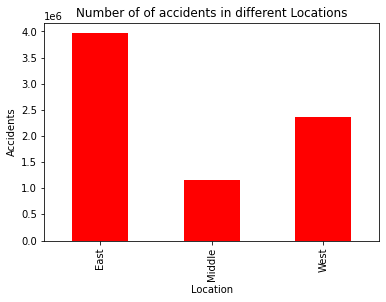

In [9]:
# printout all states
df['State'].unique()
# define west,middle and east states
west_states = ['CA', 'WA', 'OR', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM']
middle_states = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'MN', 'IA', 'MO', 'AR', 'LA']
east_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'DC', 'WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'OH', 'IN', 'MI', 'WI', 'IL']

# Function to classify states
def classify_state(state):
    if state in west_states:
        return 'West'
    elif state in middle_states:
        return 'Middle'
    elif state in east_states:
        return 'East'
    else:
        return 'Unknown'
# Create 'location' column
df['Location'] = df['State'].apply(classify_state)

# how many accidents in locations
df_location = df.groupby(['Location'])['Location'].count()
print(df_location)

#visualise how many accidents in locations
df_location.plot(kind='bar')
ax = df_location.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in different Locations")
plt.show()

In [10]:
# how many accidents in states
df3 = df.groupby(['State'])['State'].count().sort_values(ascending=False)
#select top 15
#print(df3.iloc[:15])

#visualise how many accidents in states
#select top 15
#df4 = df3.iloc[:15]
#df4.plot(kind='bar')
#ax = df4.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accidents in different states")
# Add exact numbers on top of each bar
#plt.show()



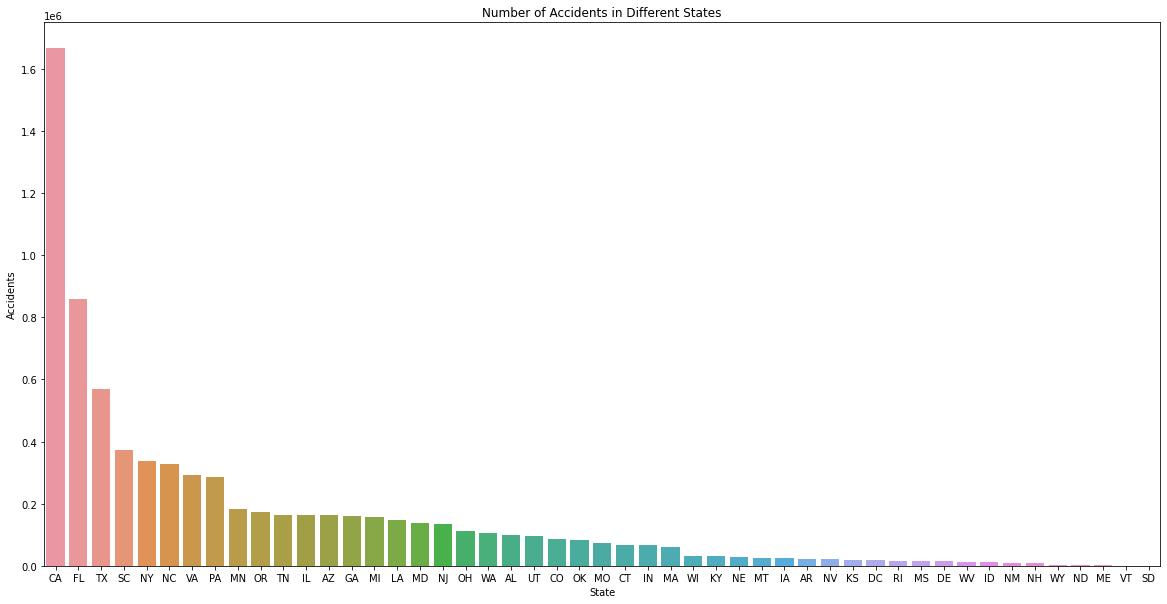

In [11]:

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df3.index, y=df3)
plt.ylabel('Accidents')
plt.title("Number of Accidents in Different States")

plt.show()

In [12]:
# how many accidents in cities
df5 = df.groupby(['City'])['City'].count().sort_values(ascending=False)
#select top 10
df_first_20 = df5.iloc[:20]

#visualise how many accidents in cities
#select top 10
#df6 = df5.iloc[:10]
#df6.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accidents in different cities")
#plt.show()


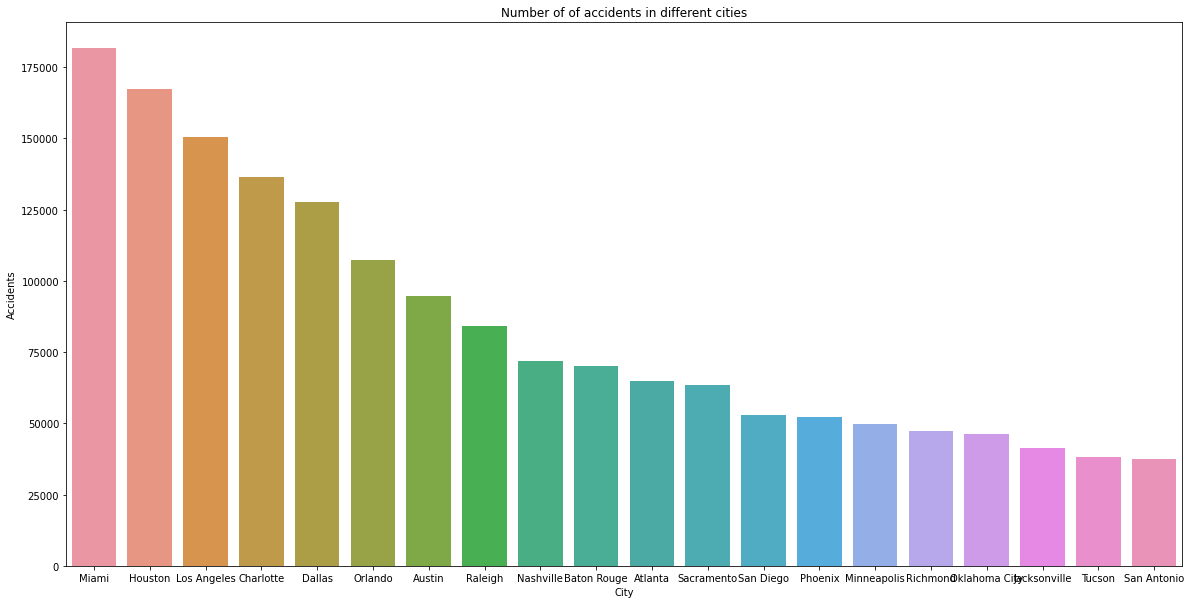

In [13]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df_first_20.index, y=df_first_20)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different cities")

plt.show()

Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
Name: Year, dtype: int64


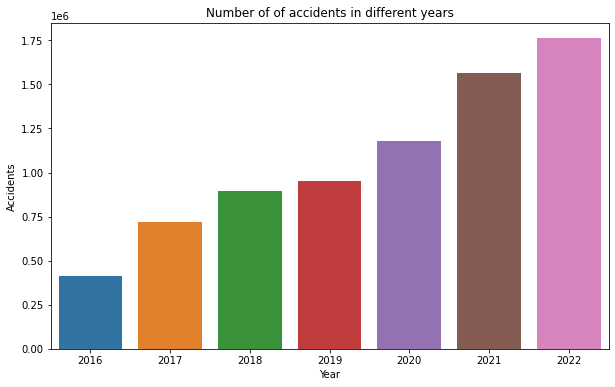

Year
2016      NaN
2017    74.79
2018    24.42
2019     6.81
2020    23.54
2021    32.64
2022    12.71
Name: Year, dtype: float64


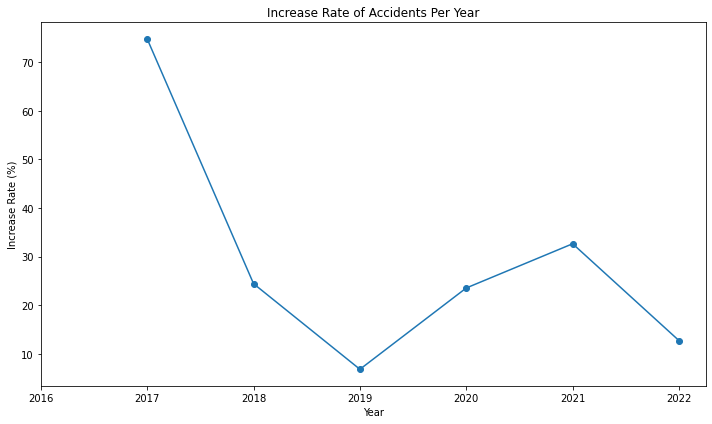

29.15

In [14]:
# transform data type
# df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# how many accidents in different years
df['Year'] = df['Start_Time'].dt.year
df7 = df.groupby(['Year'])['Year'].count().sort_values(ascending=True)
print(df7)

#visualise how many accidents in years
#select top 10 in df7
#df8=df7.iloc[:10]
#df8.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accidents in different years")
#plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df7.index, y=df7)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different years")
plt.show()



# Calculate the increase rate for each year
df_increase_rate = df7.pct_change() * 100
# Round increase rate values to two decimal places
df_increase_rate = df_increase_rate.round(2)
print(df_increase_rate)

# Visualize increase rate by line chart
plt.figure(figsize=(10, 6))
plt.plot(df_increase_rate.index, df_increase_rate.values, marker='o')
plt.title('Increase Rate of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Increase Rate (%)')
plt.grid(False)
plt.xticks(df_increase_rate.index)
plt.tight_layout()
plt.show()

# Calculate the average increase yearly
average_increase = df_increase_rate.mean()
average_increase = average_increase.round(2)
average_increase


In [15]:
# Use funtion to automate caulating variation by year and visualisation
def plot_state_variation(data, year1, year2):
    # Filter data for specific years
    df_year1 = data[data['Year'] == year1]
    df_year2 = data[data['Year'] == year2]

    # Group and count for the given years
    df_year1_state = df_year1.groupby('State')['ID'].count().reset_index(name=f'Count-{year1}')
    df_year2_state = df_year2.groupby('State')['ID'].count().reset_index(name=f'Count-{year2}')

    # Merge dataframes
    new_df_both = pd.merge(df_year2_state, df_year1_state, on='State', how='inner')

    # Calculate variation
    new_df_both['Variation'] = new_df_both[f'Count-{year2}'] - new_df_both[f'Count-{year1}']

    # Sort by variation
    new_df_both = new_df_both.sort_values(by='Variation', ascending=False)

    # Set the style of the plot
    # sns.set(style="whitegrid")

    # Create a bar plot using Seaborn
    plt.figure(figsize=(20, 10))
    sns.barplot(x='State', y='Variation', data=new_df_both)

    # Add labels and title
    plt.xlabel('State')
    plt.ylabel('Variation')
    plt.title(f'Variation by State from {year1} to {year2}')

    # Display the plot
    plt.show()



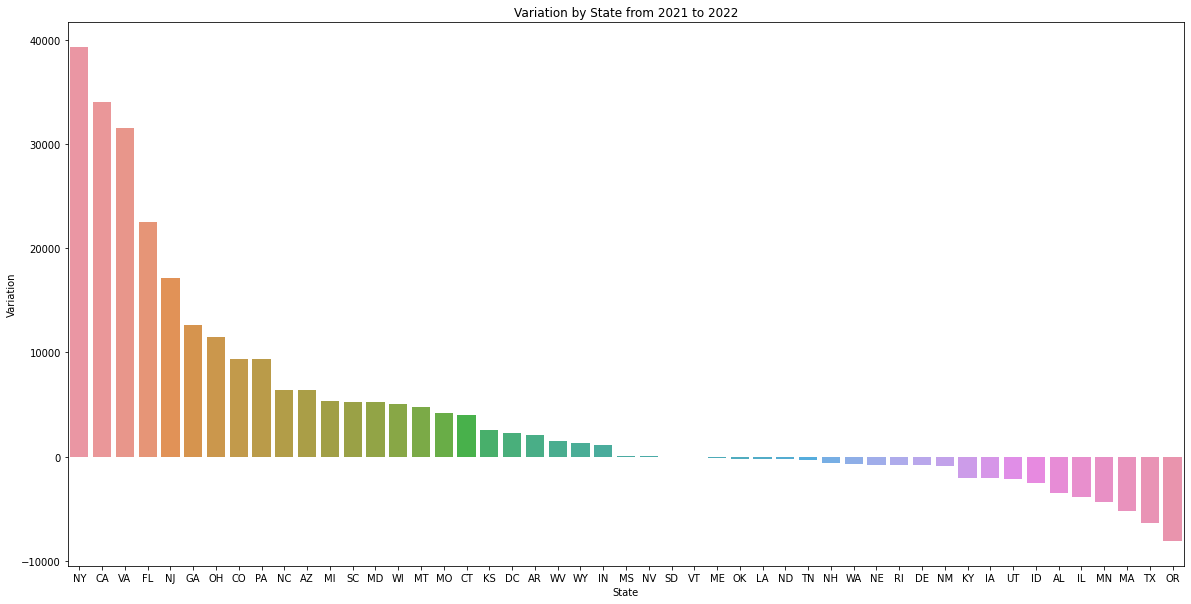

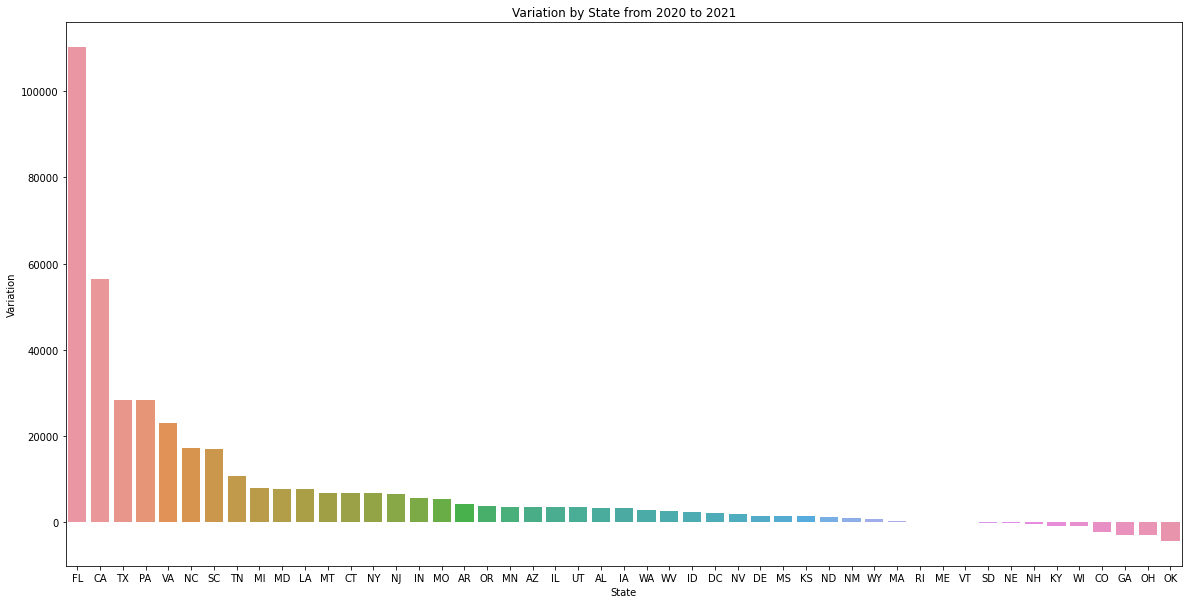

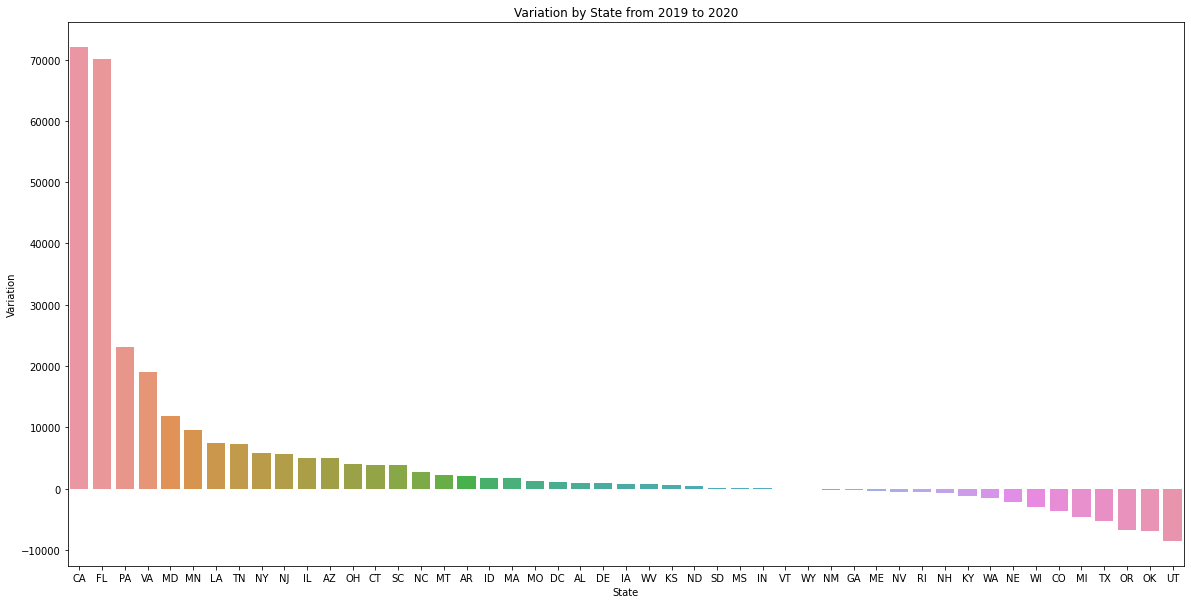

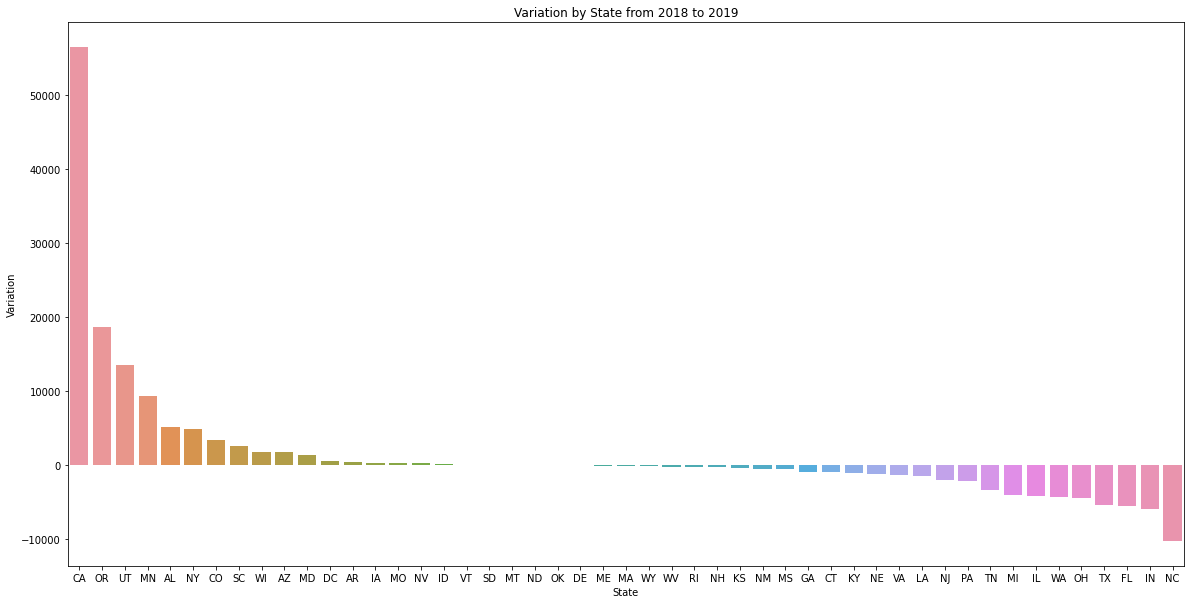

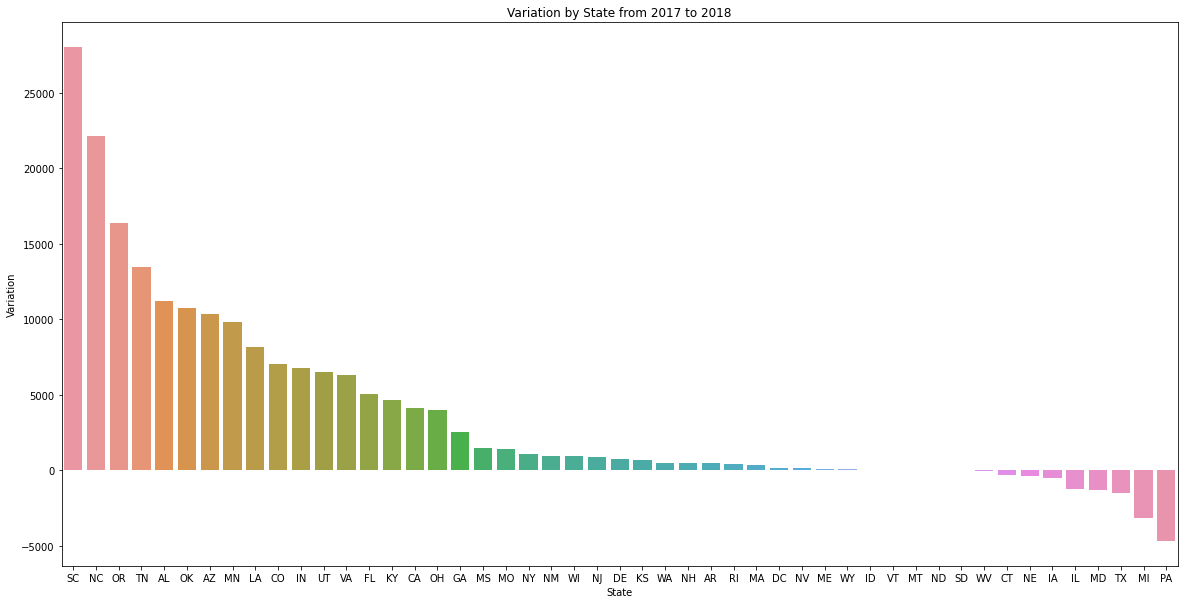

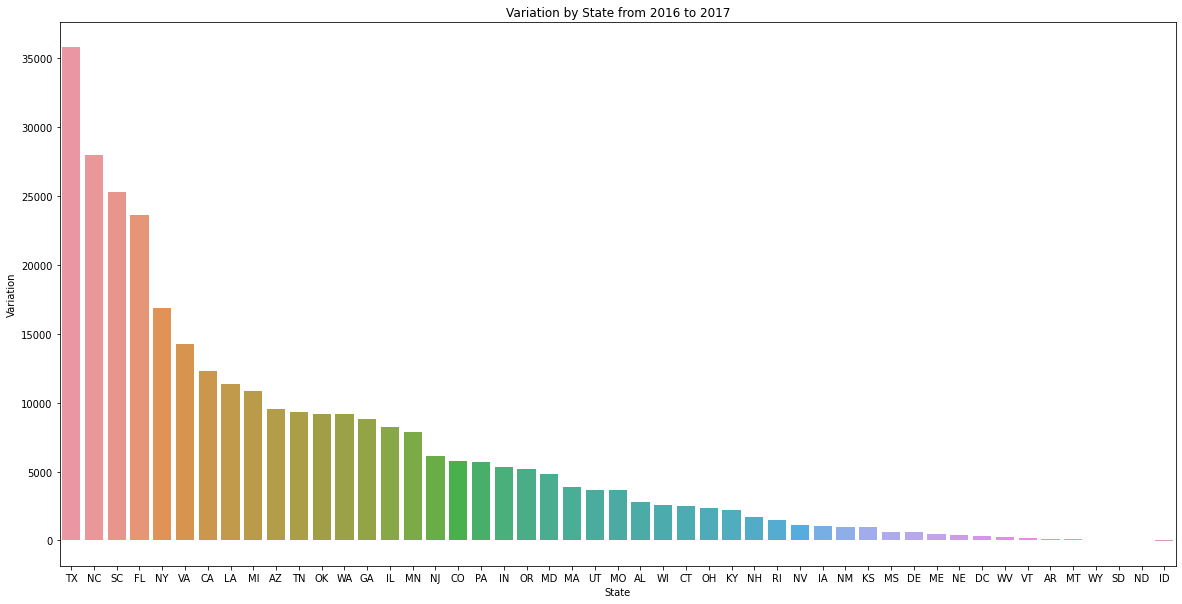

In [16]:
plot_state_variation(df, 2021, 2022)
plot_state_variation(df, 2020, 2021)
plot_state_variation(df, 2019, 2020)
plot_state_variation(df, 2018, 2019)
plot_state_variation(df, 2017, 2018)
plot_state_variation(df, 2016, 2017)

In [17]:
# how many accidents in different months
df['Month'] = df['Start_Time'].dt.month
df9 = df.groupby(['Month'])['Month'].count().sort_values(ascending=False)
print(df9)

Month
12    847343
11    760165
10    675130
9     651381
2     603452
8     599666
1     591032
4     587300
6     571373
5     558176
3     524408
7     512335
Name: Month, dtype: int64


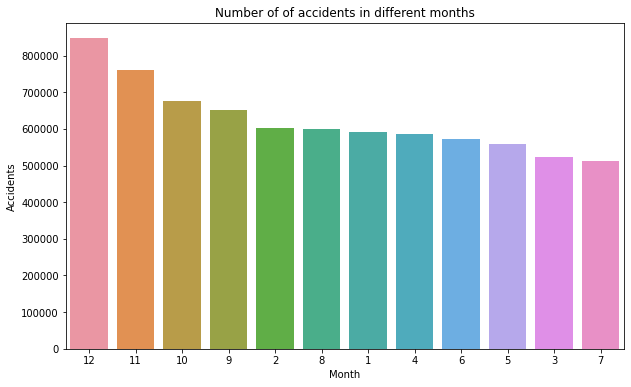

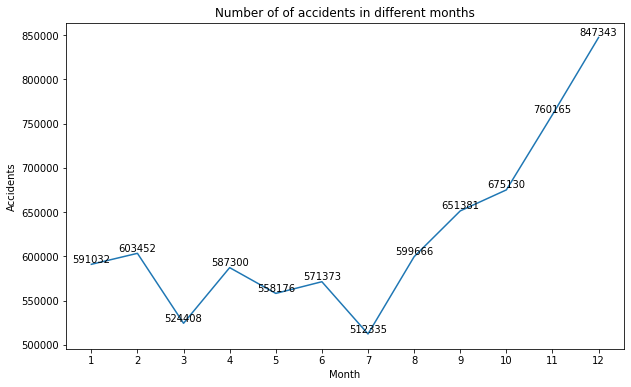

In [18]:
plt.figure(figsize=(10, 6))
# Use order to sort df9.index in sns.barplot
ax = sns.barplot(x=df9.index, y=df9.values, order=df9.index)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
plt.show()

plt.figure(figsize=(10, 6))
# Use order to sort df9.index in sns.barplot
ax = sns.lineplot(x=df9.index, y=df9.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
# Set x-axis ticks to show all months
plt.xticks(df9.index)

# Show data points with exact values
for x, y in zip(df9.index, df9.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

In [19]:
# how many accidents in different weekdays
df['Weekday'] = df['Start_Time'].dt.weekday
df11 = df.groupby(['Weekday'])['Weekday'].count().sort_values(ascending=False)
print(df11)

Weekday
4    1326626
3    1278055
2    1272842
1    1249508
0    1174058
5     645655
6     535017
Name: Weekday, dtype: int64


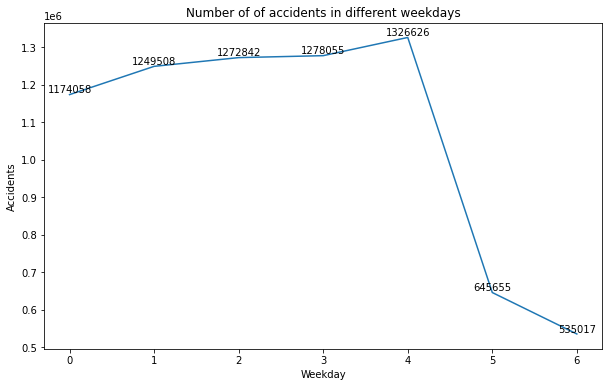

In [20]:
#notice: Monday=0, Sunday=6 in pandas
plt.figure(figsize=(10, 6))
# Use order to sort df11.index in sns.barplot
ax = sns.lineplot(x=df11.index, y=df11.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different weekdays")
# Set x-axis ticks to show all weekdays
plt.xticks(df11.index)

# Show data points with exact values
for x, y in zip(df11.index, df11.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

In [21]:
# how many accidents in different hours
df['Hours'] = df['Start_Time'].dt.hour
df13 = df.groupby(['Hours'])['Hours'].count()
print(df13)

#visualise how many accidents in hours
#select top 24 in df13
#df14=df13.iloc[:24]
#df14.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accident in different hours during the day")
#plt.show()

Hours
0     107770
1      93326
2      89573
3      80532
4     156094
5     221061
6     392588
7     570282
8     562356
9     351785
10    332821
11    344521
12    343332
13    383342
14    433033
15    507572
16    564017
17    559057
18    418223
19    285436
20    217469
21    184426
22    161682
23    121463
Name: Hours, dtype: int64


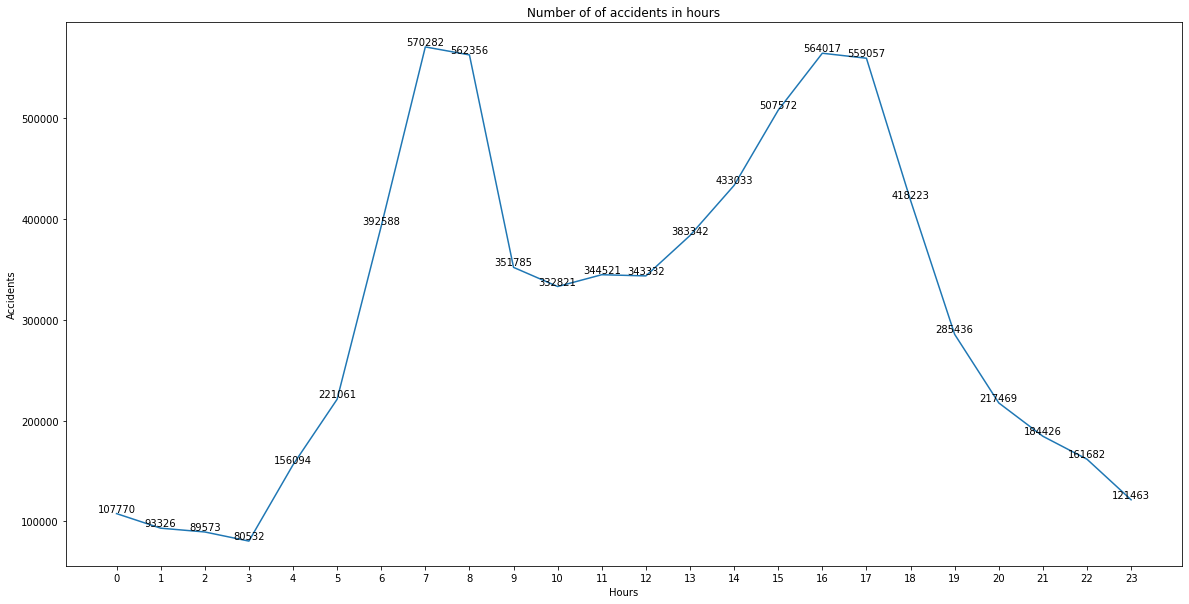

In [22]:
plt.figure(figsize=(20, 10))
# Use order to sort df13.index in sns.barplot
ax = sns.lineplot(x=df13.index, y=df13.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in hours")
# Set x-axis ticks to show all weekdays
plt.xticks(df13.index)
# Show data points with exact values
for x, y in zip(df13.index, df13.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

Weather_Condition
Fair                2463598
Mostly Cloudy        990247
Clear                808743
Cloudy               769429
Partly Cloudy        685487
Overcast             382866
Light Rain           336701
Scattered Clouds     204829
Light Snow           116468
Fog                   93622
Rain                  79308
Haze                  75252
Fair / Windy          33847
Heavy Rain            30929
Light Drizzle         21861
Name: Weather_Condition, dtype: int64


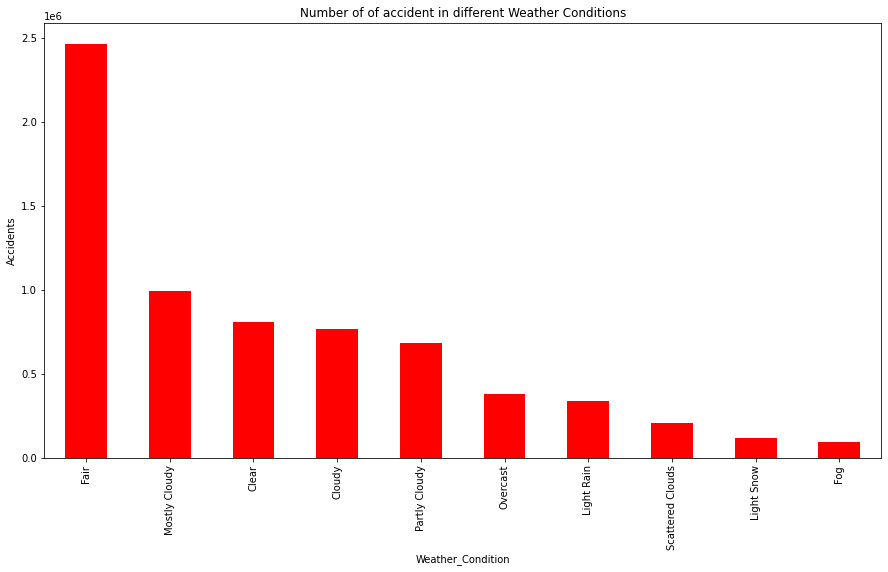

In [23]:
# how many accidents in different Weather_Condition
df15 = df.groupby(['Weather_Condition'])['Weather_Condition'].count().sort_values(ascending=False)
print(df15.head(15))
#visualise how many accidents in Weather_Condition
#select top 24 in df13
df16=df15.iloc[:10]
plt.figure(figsize=(15, 8))
df16.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different Weather Conditions")
plt.show()

Severity
2    5917409
3    1299337
4     197649
1      67366
Name: Severity, dtype: int64


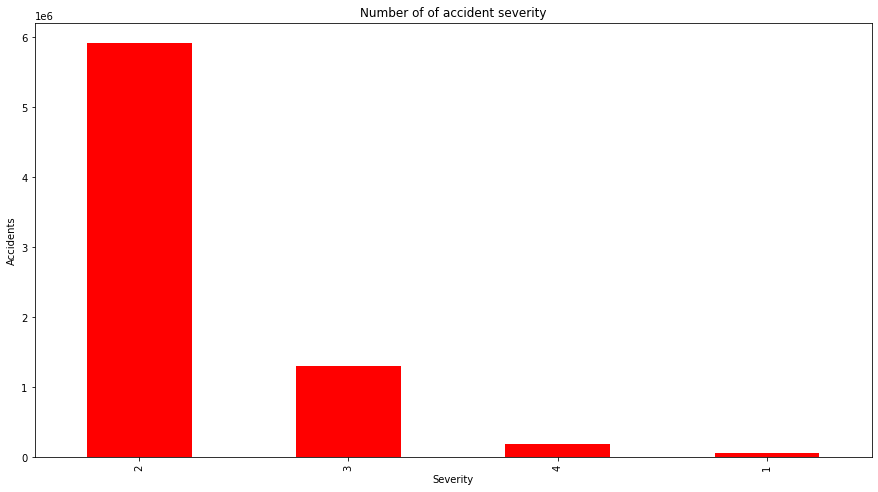

In [24]:
# how many accidents in different Severity
df17 = df.groupby(['Severity'])['Severity'].count().sort_values(ascending=False)
print(df17)
#visualise how many accidents in Severity
#select top 24 in df13
df18=df17.iloc[:10]
plt.figure(figsize=(15, 8))
df17.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident severity")
plt.show()

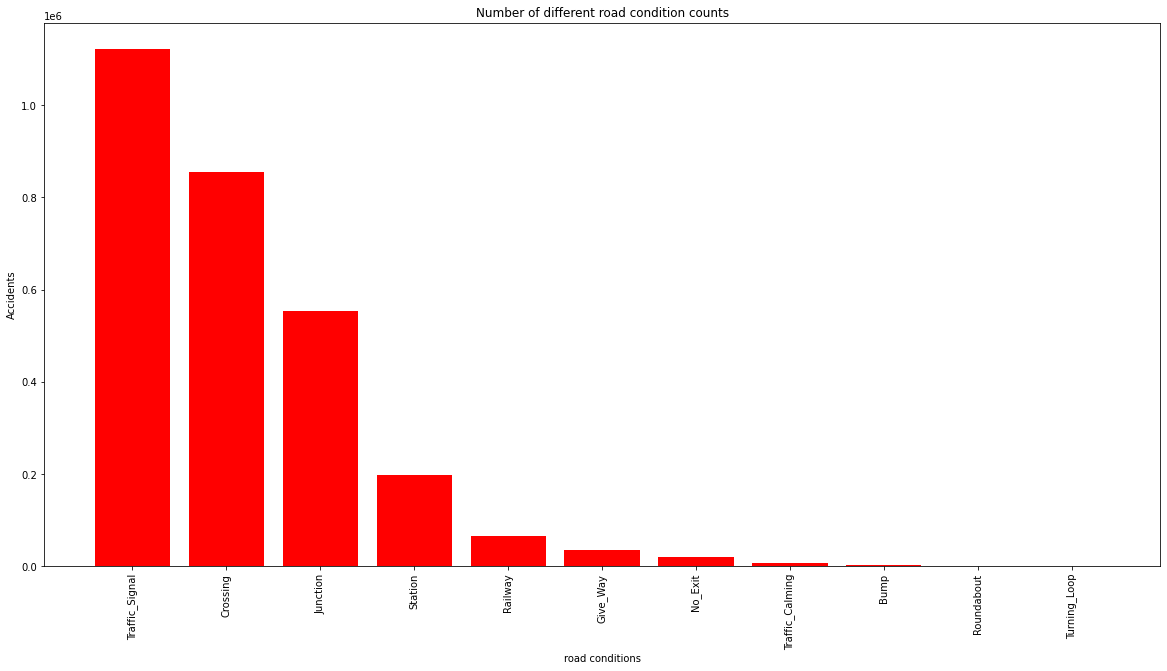

In [25]:
#Comparison of different road conditons counts

# Count the number of 'true' values in each column
columns = ['Crossing', 'Bump', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
           'Station', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
true_counts = []
for column in columns:
    true_count = df[column].value_counts().get(True, 0)
    true_counts.append(true_count)

    # Sort the counts in descending order
sorted_counts = sorted(true_counts, reverse=True)
sorted_columns = [column for _, column in sorted(zip(true_counts, columns), reverse=True)]

# Create a bar chart
plt.figure(figsize=(20, 10))
plt.bar(sorted_columns, sorted_counts,color='red')
plt.xlabel('road conditions')
plt.ylabel('Accidents')
plt.title("Number of different road condition counts")
plt.xticks(rotation=90)
plt.show()

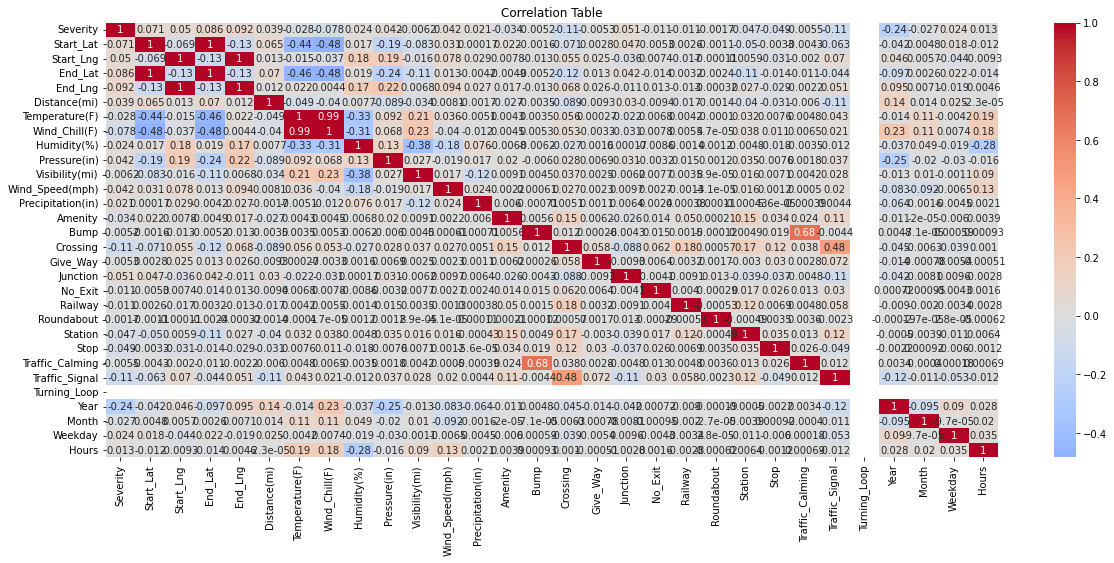

In [27]:
# Set the size
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Table')
plt.show()